In [2]:
import cv2
import os
import pandas as pd

IMG_WIDTH=30
IMG_HEIGHT=30

# a method suitable for both training data and test data loading
def load_data(data_dir, csv_file_path):
    images,labels=[],[]
    df=pd.read_csv(csv_file_path)
    df=df[["ClassId","Path"]]
    for row in df.itertuples():
        image_path=os.path.join(data_dir, row.Path)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        images.append(resized_image)
        labels.append(int(row.ClassId))
        '''print(images)
        print(type(images[0]))
        print(images[0].shape)
        print(labels)'''
    print("Data loaded")
    return (images,labels)

# loading the test and training data
def load_train_and_test_data(data_dir):
    train,test="Train.csv","Test.csv"
    files=set([f for f in os.listdir(data_dir)])
    if test in files:
        test_label_path=os.path.join(data_dir,test)
        x_train,y_train=load_data(data_dir,test_label_path)
    else:
        raise Exception("Test labels are not available")
    if train in files:
        train_label_path=os.path.join(data_dir,train)
        x_test,y_test=load_data(data_dir,train_label_path)
    else:
        raise Exception("Training labels are not available")
    return (x_train,y_train,x_test,y_test)


In [3]:
import numpy as np

def data_preprocessing(x_train,x_test):
    # mean subtraction and normalization
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std
    print("Data preprocessing completed.")
    return (x_train,x_test)

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from model_training import get_model
from data_preprocessing import data_preprocessing
from data_loading import load_train_and_test_data

EPOCHS = 10
num_of_categories=43
IMG_WIDTH=30
IMG_HEIGHT=30

# load the train and test data
x_train, y_train, x_test, y_test = load_train_and_test_data("data")
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Data loaded from  data\Test.csv
Data loaded from  data\Train.csv
Data loaded from  data\Test.csv
Data loaded from  data\Train.csv


In [5]:
import tensorflow as tf
num_of_categories=43
IMG_WIDTH=30
IMG_HEIGHT=30
dropout_rate,regularization_strength=0.3,0.3
def get_model(use_BN):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        *([tf.keras.layers.BatchNormalization()] if use_BN else []),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(regularization_strength), kernel_initializer='he_normal'),
        tf.keras.layers.Flatten(),
        *([tf.keras.layers.BatchNormalization()] if use_BN else []),
        tf.keras.layers.Dense(128, activation="relu", kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)),
        tf.keras.layers.Dropout(dropout_rate),
        *([tf.keras.layers.BatchNormalization()] if use_BN else []),
        tf.keras.layers.Dense(num_of_categories, activation="softmax")
    ])
    model.compile(
        optimizer="adam",  
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    print("Model trained.")
    return model


In [6]:
BNs=[True,False]
data_preprocessings=[True,False]
accuracies=[[0,0],[0,0]]
for i in range(len(BNs)):
    for j in range(len(data_preprocessings)):
        if data_preprocessings[j]:
            x_train, x_test=data_preprocessing(x_train, x_test)
    
        model = get_model(BNs[i])

        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=32)

        # Evaluate neural network performance
        loss,accuracy=model.evaluate(x_test, y_test, verbose=2, batch_size=32)
        accuracies[i][j]=accuracy

Data preprocessing completed.


c:\Users\smile\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model trained.
Epoch 1/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 52s 105ms/step - accuracy: 0.4805 - loss: 37.9477
Epoch 2/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.6844 - loss: 5.0205
Epoch 3/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7414 - loss: 3.8949
Epoch 4/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.8027 - loss: 2.8227
Epoch 5/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8271 - loss: 2.4466
Epoch 6/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 47s 118ms/step - accuracy: 0.8521 - loss: 2.0874
Epoch 7/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8560 - loss: 1.8950
Epoch 8/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 59s 148ms/step - accuracy: 0.8649 - loss: 1.7694
Epoch 9/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 86s 158ms/step - accuracy: 0.8723 - loss: 1.6503
Epoch 10/10
395/395 ━━━━━━━━━━━━━━━━━━━━ 89s 175ms/step - accuracy: 0.8787 - loss: 1.6055
1226/1226 - 53s - 43ms/step - accuracy: 0.8497 - loss: 1.6921
Model trained.
Epoch 1/10
395/39

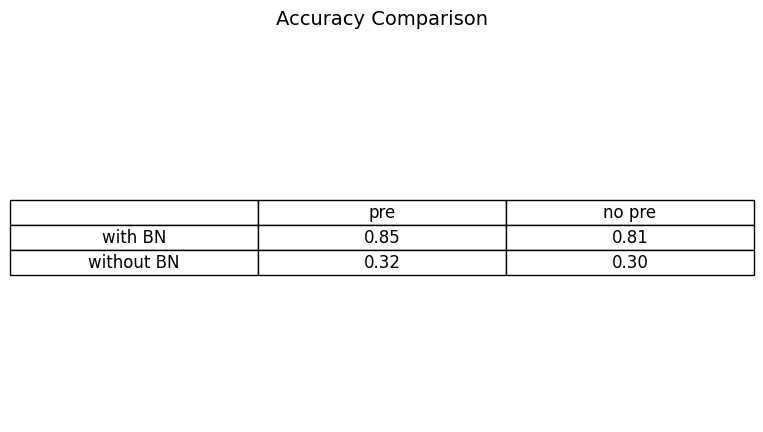

In [8]:
import matplotlib.pyplot as plt
from matplotlib.table import Table


# round the accuracies
accuracies=[[round(acc, 2) for acc in accuracies[j]] for j in range(len(accuracies))]

# format the floats with uniform precision
accuracies=[[format(acc, '.2f') for acc in accuracies[j]] for j in range(len(accuracies))]

# Format: [ [with BN + pre, with BN + no pre],
#           [without BN + pre, without BN + no pre] ]
row_labels = ["with BN", "without BN"]
col_labels = ["pre", "no pre"]

# Create a blank figure and axis
fig, ax = plt.subplots()
ax.set_axis_off()

# Create the table
table_data = [[""] + col_labels]  # header row
for row_label, row_data in zip(row_labels, accuracies):
    table_data.append([row_label] + row_data)

# Draw table
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Accuracy Comparison", fontsize=14, pad=20)
plt.show()